# Description

TODO

# Modules loading

In [34]:
import numpy as np
import pandas as pd
# from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
DATASET_CONFIG = conf.GTEX
GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_DATA_DIR = DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
assert OUTPUT_DATA_DIR.exists()
display(OUTPUT_DATA_DIR)

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections')

In [5]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / f"gtex_{GTEX_TISSUE}"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/gtex_whole_blood')

In [6]:
INPUT_GENE_EXPR_FILE = (
    DATASET_CONFIG["GENE_SELECTION_DIR"]
    / f"gtex_v8_data_{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_EXPR_FILE)

assert INPUT_GENE_EXPR_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_selection/gtex_v8_data_whole_blood-var_pc_log2.pkl')

In [7]:
INPUT_GENE_PAIRS_INTERSECTIONS_FILE = (
    DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
    / f"gene_pair_intersections-gtex_v8-{GTEX_TISSUE}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

assert INPUT_GENE_PAIRS_INTERSECTIONS_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/gene_pair_intersections-gtex_v8-whole_blood-var_pc_log2.pkl')

In [8]:
INPUT_PVALUES_FILE = DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"] / "pvalues" / "gene_pair-samples-pvalues-fdr.pkl"
display(INPUT_PVALUES_FILE)
assert INPUT_PVALUES_FILE.exists()

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/pvalues/gene_pair-samples-pvalues-fdr.pkl')

# Data

## Gene Ensembl ID -> Symbol mapping

In [9]:
gene_map = pd.read_pickle(
    DATASET_CONFIG["DATA_DIR"] / "gtex_gene_id_symbol_mappings.pkl"
)

In [10]:
gene_map = gene_map.set_index("gene_ens_id")["gene_symbol"].to_dict()

In [11]:
assert gene_map["ENSG00000145309.5"] == "CABS1"

## Gene expression

In [12]:
gene_expr_df = pd.read_pickle(INPUT_GENE_EXPR_FILE)

In [13]:
gene_expr_df.shape

(5000, 755)

In [14]:
gene_expr_df.head()

,GTEX-111YS-0006-SM-5NQBE,GTEX-1122O-0005-SM-5O99J,GTEX-1128S-0005-SM-5P9HI,GTEX-113IC-0006-SM-5NQ9C,GTEX-113JC-0006-SM-5O997,GTEX-117XS-0005-SM-5PNU6,GTEX-117YW-0005-SM-5NQ8Z,GTEX-1192W-0005-SM-5NQBQ,GTEX-1192X-0005-SM-5NQC3,GTEX-11DXW-0006-SM-5NQ7Y,...,GTEX-ZVE2-0006-SM-51MRW,GTEX-ZVP2-0005-SM-51MRK,GTEX-ZVT2-0005-SM-57WBW,GTEX-ZVT3-0006-SM-51MT9,GTEX-ZVT4-0006-SM-57WB8,GTEX-ZVTK-0006-SM-57WBK,GTEX-ZVZP-0006-SM-51MSW,GTEX-ZVZQ-0006-SM-51MR8,GTEX-ZXES-0005-SM-57WCB,GTEX-ZXG5-0005-SM-57WCN
gene_ens_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000169429.10,0.5623,0.8067,116.90000,4.047,211.0,58.110,68.38,249.50,5.095,295.9,...,39.960,0.1393,0.22380,245.0,513.6,1626.00,0.5633,515.70,1.19400,1163.00
ENSG00000135245.9,0.6529,1.3850,199.20000,2.266,116.7,192.300,161.50,263.50,23.540,251.9,...,114.300,1.8330,0.41150,149.0,935.3,233.60,0.8882,134.00,1.12000,295.70
ENSG00000163631.16,1.8480,0.2503,0.08429,1.251,1348.0,9.971,101.30,95.09,1.264,119.3,...,2.092,2.1100,0.03588,171.8,107.1,71.25,1.7720,309.60,0.07361,17.75
ENSG00000277632.1,1.6960,1.3450,235.10000,11.770,141.7,199.100,525.50,659.90,10.910,209.3,...,61.340,2.2500,0.72310,261.2,400.0,288.50,2.6960,287.50,3.32300,618.90
ENSG00000239839.6,185.2000,1.7790,694.30000,23.840,297.3,3122.000,2521.00,1504.00,80.060,652.0,...,1010.000,253.8000,94.52000,6083.0,2768.0,52.06,34.5700,17.36,352.30000,63.85


## Gene pairs intersection

In [15]:
df_plot = pd.read_pickle(INPUT_GENE_PAIRS_INTERSECTIONS_FILE).sort_index()

In [16]:
df_plot.shape

(12497500, 9)

In [17]:
df_plot.head()

Pearson (high)  Pearson (low)  \
ENSG00000000419.12 ENSG00000002834.17            True          False   
                   ENSG00000002919.14            True          False   
                   ENSG00000002933.7            False           True   
                   ENSG00000003402.19            True          False   
                   ENSG00000004478.7            False           True   

                                       Spearman (high)  Spearman (low)  \
ENSG00000000419.12 ENSG00000002834.17             True           False   
                   ENSG00000002919.14             True           False   
                   ENSG00000002933.7             False            True   
                   ENSG00000003402.19             True           False   
                   ENSG00000004478.7             False           False   

                                       Clustermatch (high)  \
ENSG00000000419.12 ENSG00000002834.17                 True   
                   ENSG00000002919.14                 True   
                   ENSG00000002933.7                 False   
                   ENSG00000003402.19                 True   
                   ENSG00000004478.7                 False   

                                       Clustermatch (low)       ccc   pearson  \
ENSG00000000419.12 ENSG00000002834.17               False  0.418721  0.681847   
                   ENSG00000002919.14               False  0.405090  0.734699   
                   ENSG00000002933.7                 True  0.007466  0.013825   
                   ENSG00000003402.19               False  0.391683  0.727347   
                   ENSG00000004478.7                False  0.099013  0.094147   

                                       spearman  
ENSG00000000419.12 ENSG00000002834.17  0.786595  
                   ENSG00000002919.14  0.816991  
                   ENSG00000002933.7   0.004128  
                   ENSG00000003402.19  0.803653  
                   ENSG00000004478.7   0.231269

## p-values

In [18]:
df_pvalues = pd.read_pickle(INPUT_PVALUES_FILE).sort_index()

In [19]:
df_pvalues.shape

(12116, 10)

In [20]:
df_pvalues.head()

group  \
gene0              gene1                                                      
ENSG00000000938.12 ENSG00000128342.4   ccc_high_and_pearson_low-top_pearson   
                   ENSG00000249138.1        ccc_high_and_pearson_low-random   
ENSG00000001167.14 ENSG00000119862.12                       all_low-top_ccc   
                   ENSG00000131475.6                    all_low-top_pearson   
ENSG00000001561.6  ENSG00000086730.16                        all_low-random   

                                            ccc   ccc_fdr    ccc_pvalue  \
gene0              gene1                                                  
ENSG00000000938.12 ENSG00000128342.4   0.232700  0.000001  9.999990e-07   
                   ENSG00000249138.1   0.198172  0.000001  9.999990e-07   
ENSG00000001167.14 ENSG00000119862.12  0.034955  0.000001  9.999990e-07   
                   ENSG00000131475.6   0.028636  0.000004  2.999997e-06   
ENSG00000001561.6  ENSG00000086730.16  0.018550  0.000149  1.289999e-04   

                                        pearson  pearson_fdr  pearson_pvalue  \
gene0              gene1                                                       
ENSG00000000938.12 ENSG00000128342.4  -0.116906     0.002597        0.001291   
                   ENSG00000249138.1  -0.093076     0.015275        0.010503   
ENSG00000001167.14 ENSG00000119862.12  0.024366     0.532093        0.503820   
                   ENSG00000131475.6  -0.117799     0.002597        0.001184   
ENSG00000001561.6  ENSG00000086730.16 -0.002443     0.951313        0.946568   

                                       spearman  spearman_fdr  spearman_pvalue  
gene0              gene1                                                        
ENSG00000000938.12 ENSG00000128342.4  -0.473951  2.787320e-43     1.534672e-43  
                   ENSG00000249138.1  -0.308136  7.175155e-18     4.538519e-18  
ENSG00000001167.14 ENSG00000119862.12  0.091169  1.377640e-02     1.220580e-02  
                   ENSG00000131475.6  -0.046469  2.136647e-01     2.021593e-01  
ENSG00000001561.6  ENSG00000086730.16  0.059267  1.116711e-01     1.036914e-01

In [21]:
# remove duplicated gene pairs
df_pvalues = df_pvalues[~df_pvalues.index.duplicated(keep="first")]

**Note**: Here the "group" column specifies the categories in Figure 3a, followed by `top_[coef]`, where for the same category I sorted gene pairs by `coef`. This allows me, for instance, to take the gene pairs where Pearson is high and CCC is low, and sort by any of those coefficient values.

## Functions

In [32]:
def plot_gene_pair(top_pairs_df, idx, bins="log", plot_gene_ids=True):
    """
    It plots a gene pair using a hexbin plot. The idea of this function is
    to quickly have an idea of the patterns (if any) present in a couple genes.

    Args:
        top_pairs_df: a dataframe with a preselected group of genes pairs (for instance,
            those where pearson is high and ccc is low. Each row is a gene pair.
            It is the output of function get_gene_pairs.
        idx: an integer that indicates which row in top_pairs_df you want to plot.
        bins: the "bins" parameter of seaborn's jointplot.
        plot_gene_ids: it adds genes' Ensembl IDs to the x and y labels.

    Returns:
        The JointGrid object returned by seaborn.jointplot.
    """
    gene0, gene1 = top_pairs_df.iloc[idx].name
    display((gene0, gene1))

    gene0_symbol, gene1_symbol = gene_map[gene0], gene_map[gene1]
    display((gene0_symbol, gene1_symbol))

    _pearson, _pearson_fdr, _spearman, _spearman_fdr, _ccc, _ccc_fdr = top_pairs_df.loc[
        (gene0, gene1), ["pearson", "pearson_fdr", "spearman", "spearman_fdr", "ccc", "ccc_fdr"]
    ].tolist()

    p = sns.jointplot(
        data=gene_expr_df.T,
        x=gene0,
        y=gene1,
        kind="hex",
        bins=bins,
        # ylim=(0, 500),
    )

    gene_x_id = p.ax_joint.get_xlabel()
    gene_x_symbol = gene_map[gene_x_id]

    gene_y_id = p.ax_joint.get_ylabel()
    gene_y_symbol = gene_map[gene_y_id]

    if plot_gene_ids:
        p.ax_joint.set_xlabel(f"{gene_x_id}\n{gene_x_symbol}")
        p.ax_joint.set_ylabel(f"{gene_y_id}\n{gene_y_symbol}")
    else:
        p.ax_joint.set_xlabel(f"{gene_x_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene_y_symbol}", fontstyle="italic")

    _title = f"$c={_ccc:.2f}$ (${_ccc_fdr:.2e}$)  $p={_pearson:.2f}$ (${_pearson_fdr:.2e}$)    $s={_spearman:.2f}$ (${_spearman_fdr:.2e}$)"
    p.fig.suptitle(_title)

    return p

# Analyze each category of gene pairs

Here I analyze some of the categories of gene pairs in Figure 3b (disagreements in particular). For instance, "CCC high and Pearson low", or "Pearson high and CCC low".

In [25]:
df_pvalues["group"].sort_values().unique().tolist()

['all_high-random',
 'all_high-top_ccc',
 'all_high-top_pearson',
 'all_high-top_spearman',
 'all_low-random',
 'all_low-top_ccc',
 'all_low-top_pearson',
 'all_low-top_spearman',
 'ccc_high_and_pearson_low-random',
 'ccc_high_and_pearson_low-top_ccc',
 'ccc_high_and_pearson_low-top_pearson',
 'ccc_high_and_pearson_low-top_spearman',
 'ccc_high_and_spearman_low-top_ccc',
 'ccc_high_and_spearman_low-top_pearson',
 'ccc_high_and_spearman_pearson_low-top_ccc',
 'ccc_high_and_spearman_pearson_low-top_pearson',
 'ccc_spearman_high_and_pearson_low-random',
 'ccc_spearman_high_and_pearson_low-top_ccc',
 'ccc_spearman_high_and_pearson_low-top_pearson',
 'ccc_spearman_high_and_pearson_low-top_spearman',
 'entire_dataset-random',
 'pearson_high_and_ccc_low-top_ccc',
 'pearson_high_and_ccc_low-top_pearson',
 'pearson_high_and_ccc_low-top_spearman',
 'pearson_high_and_ccc_spearman_low-top_ccc',
 'pearson_high_and_ccc_spearman_low-top_pearson']

## CCC/Spearman high, Pearson low

In [27]:
cat_name = "ccc_spearman_high_and_pearson_low-"

In [29]:
_df = df_pvalues[df_pvalues["group"].str.startswith(cat_name)]

In [30]:
_df.shape

(1730, 10)

In [37]:
_df = _df.sort_values("pearson_pvalue", ascending=False)
display(_df.head())

group  \
gene0              gene1                                                           
ENSG00000136235.15 ENSG00000234906.9    ccc_spearman_high_and_pearson_low-random   
ENSG00000130649.9  ENSG00000166920.12   ccc_spearman_high_and_pearson_low-random   
ENSG00000275385.1  ENSG00000111537.4   ccc_spearman_high_and_pearson_low-top_ccc   
ENSG00000115009.11 ENSG00000133067.17   ccc_spearman_high_and_pearson_low-random   
                   ENSG00000209582.1    ccc_spearman_high_and_pearson_low-random   

                                            ccc   ccc_fdr    ccc_pvalue  \
gene0              gene1                                                  
ENSG00000136235.15 ENSG00000234906.9   0.301209  0.000001  9.999990e-07   
ENSG00000130649.9  ENSG00000166920.12  0.312986  0.000001  9.999990e-07   
ENSG00000275385.1  ENSG00000111537.4   0.501466  0.000001  9.999990e-07   
ENSG00000115009.11 ENSG00000133067.17  0.301209  0.000001  9.999990e-07   
                   ENSG00000209582.1   0.283966  0.000001  9.999990e-07   

                                        pearson  pearson_fdr  pearson_pvalue  \
gene0              gene1                                                       
ENSG00000136235.15 ENSG00000234906.9  -0.000464     0.990442        0.989837   
ENSG00000130649.9  ENSG00000166920.12  0.002225     0.955509        0.951327   
ENSG00000275385.1  ENSG00000111537.4   0.003166     0.937000        0.930800   
ENSG00000115009.11 ENSG00000133067.17  0.004325     0.913983        0.905561   
                   ENSG00000209582.1   0.004360     0.913436        0.904789   

                                       spearman   spearman_fdr  \
gene0              gene1                                         
ENSG00000136235.15 ENSG00000234906.9   0.590650   1.016960e-71   
ENSG00000130649.9  ENSG00000166920.12  0.625346   1.213538e-82   
ENSG00000275385.1  ENSG00000111537.4   0.688883  1.075978e-106   
ENSG00000115009.11 ENSG00000133067.17  0.564003   3.368544e-64   
                   ENSG00000209582.1   0.599321   2.541040e-74   

                                       spearman_pvalue  
gene0              gene1                                
ENSG00000136235.15 ENSG00000234906.9      3.447148e-72  
ENSG00000130649.9  ENSG00000166920.12     3.624307e-83  
ENSG00000275385.1  ENSG00000111537.4     2.522372e-107  
ENSG00000115009.11 ENSG00000133067.17     1.279320e-64  
                   ENSG00000209582.1      8.305455e-75

'Index: 0'

('ENSG00000136235.15', 'ENSG00000234906.9')

('GPNMB', 'APOC2')

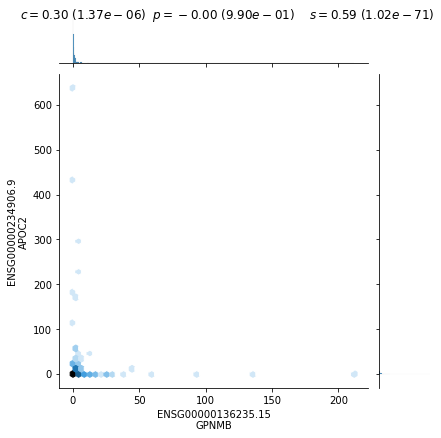

'Index: 1'

('ENSG00000130649.9', 'ENSG00000166920.12')

('CYP2E1', 'C15orf48')

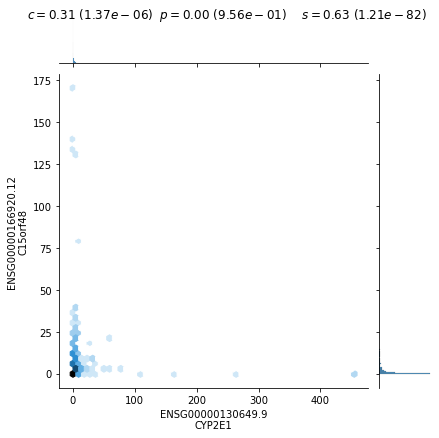

'Index: 2'

('ENSG00000275385.1', 'ENSG00000111537.4')

('CCL18', 'IFNG')

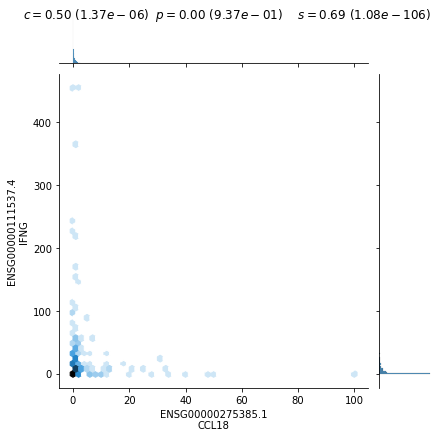

'Index: 3'

('ENSG00000115009.11', 'ENSG00000133067.17')

('CCL20', 'LGR6')

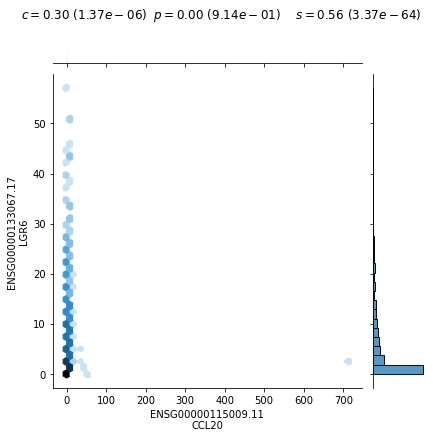

'Index: 4'

('ENSG00000115009.11', 'ENSG00000209582.1')

('CCL20', 'SNORA48')

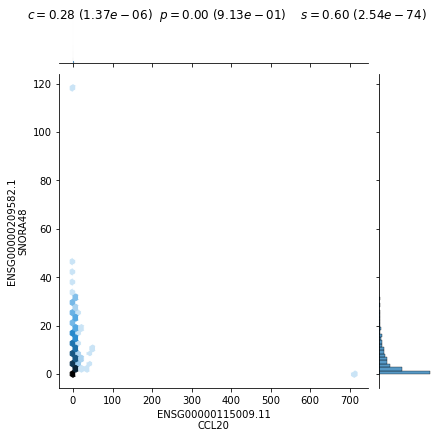

In [39]:
for i in range(min(_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_df, i)
    display(p.fig)
    plt.close(p.fig)

**Note** Using scite_ to detect some of this gave positive results, such as GPNMB and APOC2.

## CCC high, Pearson low

In [40]:
cat_name = "ccc_high_and_pearson_low-"

In [41]:
_df = df_pvalues[df_pvalues["group"].str.startswith(cat_name)]

In [42]:
_df.shape

(1943, 10)

In [43]:
_df = _df.sort_values("pearson_pvalue", ascending=False)
display(_df.head())

,,group,ccc,ccc_fdr,ccc_pvalue,pearson,pearson_fdr,pearson_pvalue,spearman,spearman_fdr,spearman_pvalue
gene0,gene1,,,,,,,,,,
ENSG00000243811.8,ENSG00000111057.10,ccc_high_and_pearson_low-random,0.191131,0.000001,9.999990e-07,0.000073,0.998512,0.998410,0.512970,1.306598e-51,6.644712e-52
ENSG00000149294.16,ENSG00000115009.11,ccc_high_and_pearson_low-random,0.272752,0.000001,9.999990e-07,-0.000283,0.994117,0.993813,0.551771,5.090980e-61,2.273425e-61
ENSG00000115009.11,ENSG00000115085.13,ccc_high_and_pearson_low-random,0.191131,0.000001,9.999990e-07,-0.000898,0.981744,0.980345,0.482724,4.619861e-45,2.503679e-45
ENSG00000158825.5,ENSG00000130598.15,ccc_high_and_pearson_low-top_spearman,0.200547,0.000001,9.999990e-07,0.000901,0.981744,0.980284,0.560100,3.365881e-63,1.440710e-63
ENSG00000105697.7,ENSG00000211689.7,ccc_high_and_pearson_low-random,0.205339,0.000001,9.999990e-07,-0.000921,0.981448,0.979849,0.521555,1.372161e-53,6.803540e-54


'Index: 0'

('ENSG00000243811.8', 'ENSG00000111057.10')

('APOBEC3D', 'KRT18')

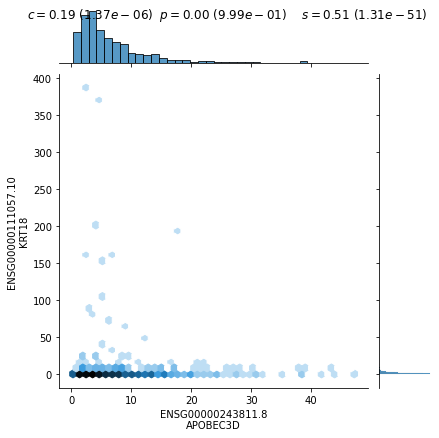

'Index: 1'

('ENSG00000149294.16', 'ENSG00000115009.11')

('NCAM1', 'CCL20')

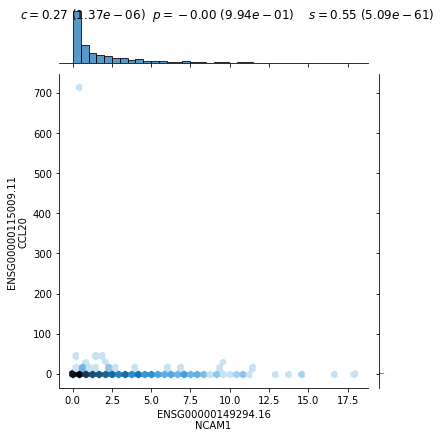

'Index: 2'

('ENSG00000115009.11', 'ENSG00000115085.13')

('CCL20', 'ZAP70')

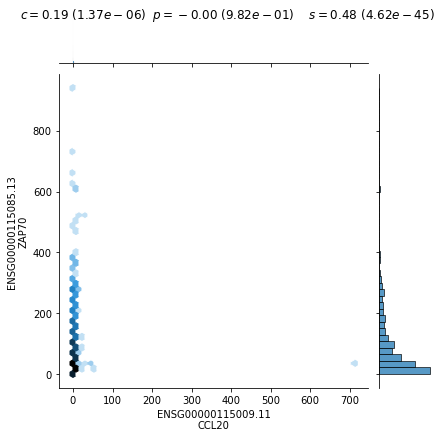

'Index: 3'

('ENSG00000158825.5', 'ENSG00000130598.15')

('CDA', 'TNNI2')

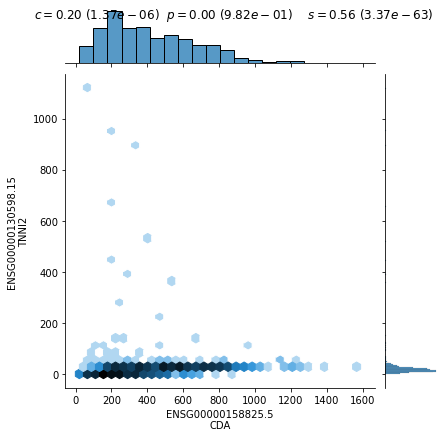

'Index: 4'

('ENSG00000105697.7', 'ENSG00000211689.7')

('HAMP', 'TRGC1')

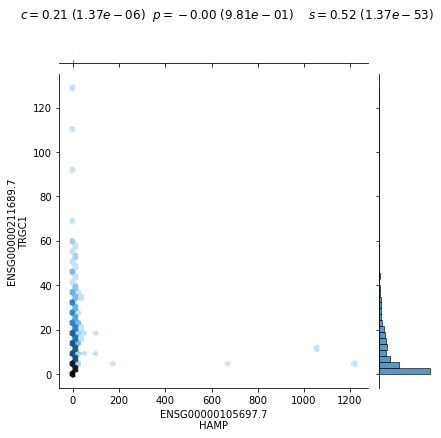

'Index: 5'

('ENSG00000120738.7', 'ENSG00000167552.13')

('EGR1', 'TUBA1A')

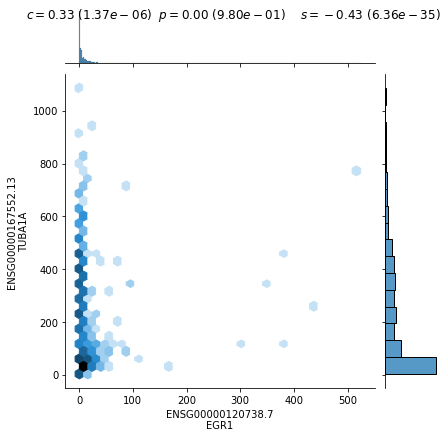

'Index: 6'

('ENSG00000211976.2', 'ENSG00000160271.14')

('IGHV3-73', 'RALGDS')

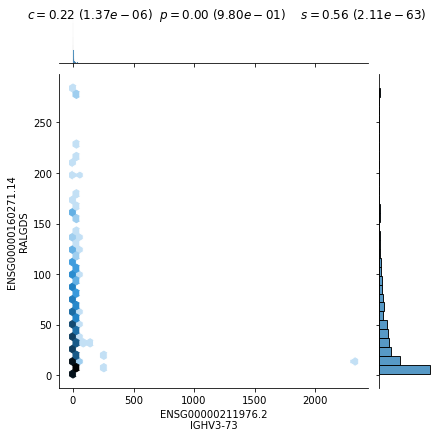

'Index: 7'

('ENSG00000111057.10', 'ENSG00000163508.12')

('KRT18', 'EOMES')

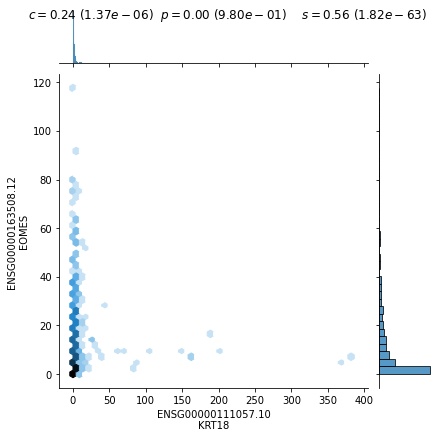

'Index: 8'

('ENSG00000115009.11', 'ENSG00000134539.16')

('CCL20', 'KLRD1')

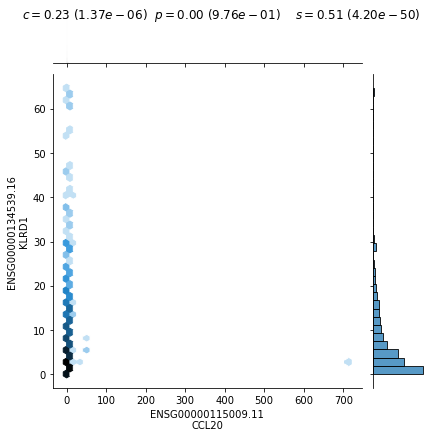

'Index: 9'

('ENSG00000261114.1', 'ENSG00000115009.11')

('RP11-325K4.2', 'CCL20')

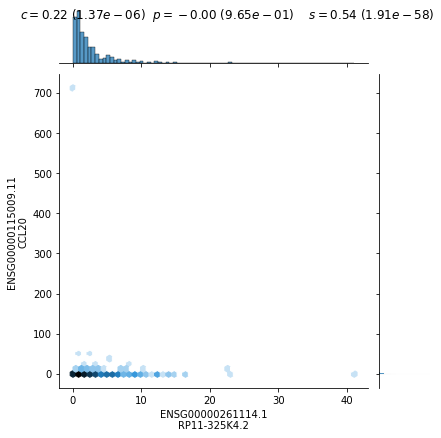

In [45]:
for i in range(min(_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_df, i)
    display(p.fig)
    plt.close(p.fig)

## CCC high, Spearman low

In [46]:
cat_name = "ccc_high_and_spearman_low-"

In [47]:
_df = df_pvalues[df_pvalues["group"].str.startswith(cat_name)]

In [48]:
_df.shape

(28, 10)

In [49]:
_df = _df.sort_values("spearman_pvalue", ascending=False)
display(_df.head())

group  \
gene0              gene1                                                   
ENSG00000147050.14 ENSG00000067048.16  ccc_high_and_spearman_low-top_ccc   
ENSG00000115165.9  ENSG00000160785.13  ccc_high_and_spearman_low-top_ccc   
ENSG00000147050.14 ENSG00000183878.15  ccc_high_and_spearman_low-top_ccc   
ENSG00000115165.9  ENSG00000101265.15  ccc_high_and_spearman_low-top_ccc   
                   ENSG00000235750.9   ccc_high_and_spearman_low-top_ccc   

                                            ccc   ccc_fdr    ccc_pvalue  \
gene0              gene1                                                  
ENSG00000147050.14 ENSG00000067048.16  0.193557  0.000001  9.999990e-07   
ENSG00000115165.9  ENSG00000160785.13  0.190192  0.000001  9.999990e-07   
ENSG00000147050.14 ENSG00000183878.15  0.294391  0.000001  9.999990e-07   
ENSG00000115165.9  ENSG00000101265.15  0.201962  0.000001  9.999990e-07   
                   ENSG00000235750.9   0.205803  0.000001  9.999990e-07   

                                        pearson   pearson_fdr  pearson_pvalue  \
gene0              gene1                                                        
ENSG00000147050.14 ENSG00000067048.16  0.237462  1.045469e-10    3.875814e-11   
ENSG00000115165.9  ENSG00000160785.13 -0.150949  8.098848e-05    3.117859e-05   
ENSG00000147050.14 ENSG00000183878.15  0.239870  6.547223e-11    2.425885e-11   
ENSG00000115165.9  ENSG00000101265.15 -0.156060  4.304138e-05    1.651730e-05   
                   ENSG00000235750.9  -0.158792  3.044918e-05    1.166330e-05   

                                       spearman  spearman_fdr  spearman_pvalue  
gene0              gene1                                                        
ENSG00000147050.14 ENSG00000067048.16  0.035350      0.346752         0.332033  
ENSG00000115165.9  ENSG00000160785.13 -0.098379      0.007791         0.006825  
ENSG00000147050.14 ENSG00000183878.15  0.100621      0.006483         0.005653  
ENSG00000115165.9  ENSG00000101265.15 -0.107882      0.003470         0.002997  
                   ENSG00000235750.9  -0.110038      0.002859         0.002464

'Index: 0'

('ENSG00000147050.14', 'ENSG00000067048.16')

('KDM6A', 'DDX3Y')

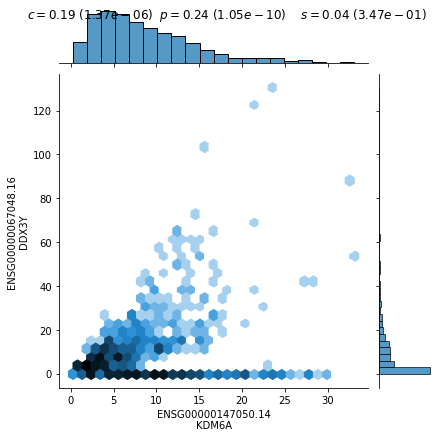

'Index: 1'

('ENSG00000115165.9', 'ENSG00000160785.13')

('CYTIP', 'SLC25A44')

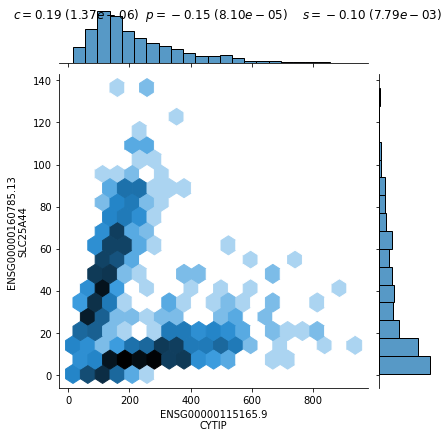

'Index: 2'

('ENSG00000147050.14', 'ENSG00000183878.15')

('KDM6A', 'UTY')

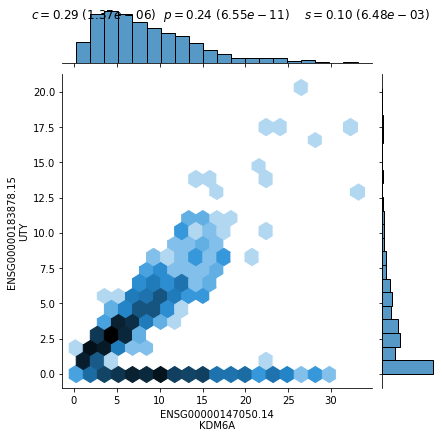

'Index: 3'

('ENSG00000115165.9', 'ENSG00000101265.15')

('CYTIP', 'RASSF2')

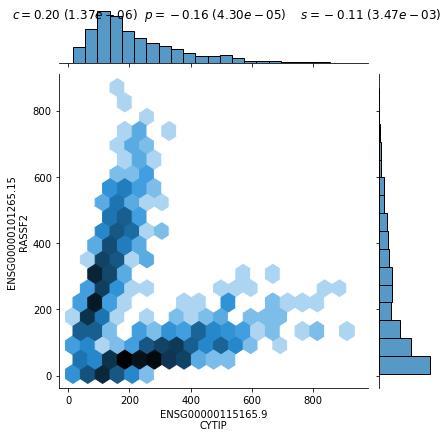

'Index: 4'

('ENSG00000115165.9', 'ENSG00000235750.9')

('CYTIP', 'KIAA0040')

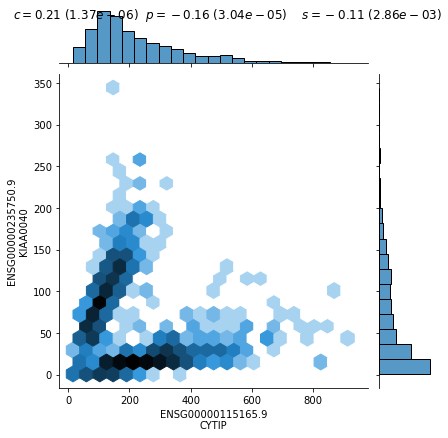

'Index: 5'

('ENSG00000115165.9', 'ENSG00000197324.8')

('CYTIP', 'LRP10')

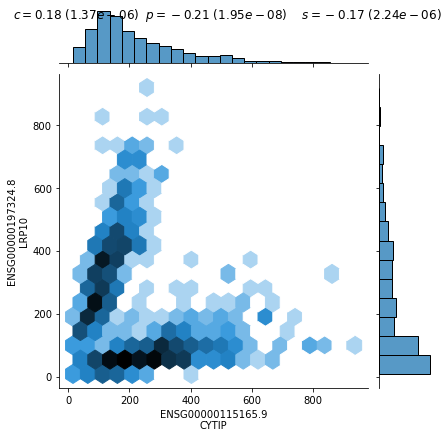

'Index: 6'

('ENSG00000115165.9', 'ENSG00000105514.7')

('CYTIP', 'RAB3D')

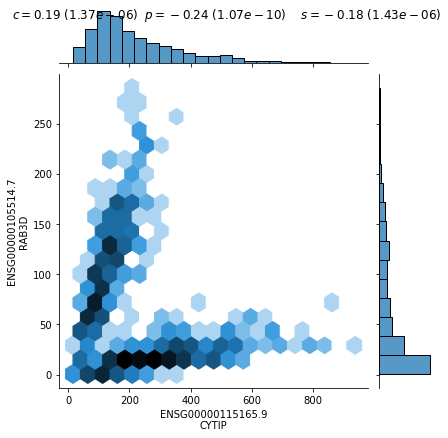

'Index: 7'

('ENSG00000005379.15', 'ENSG00000174151.14')

('TSPOAP1', 'CYB561D1')

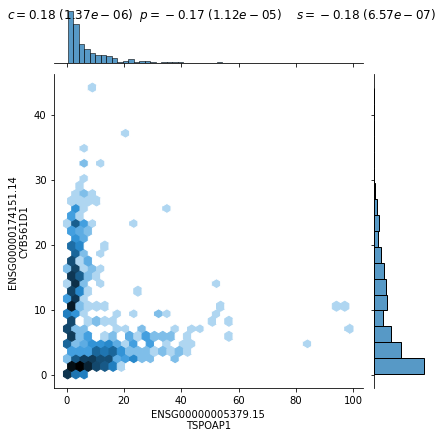

'Index: 8'

('ENSG00000167378.8', 'ENSG00000174151.14')

('IRGQ', 'CYB561D1')

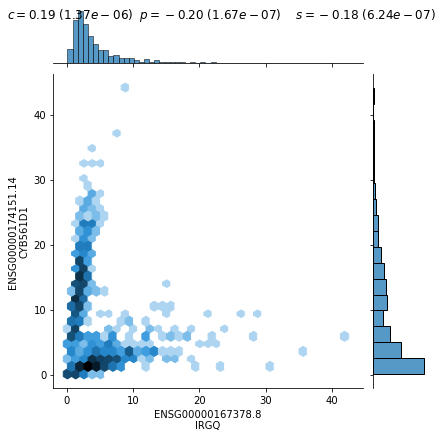

'Index: 9'

('ENSG00000129925.10', 'ENSG00000100226.15')

('TMEM8A', 'GTPBP1')

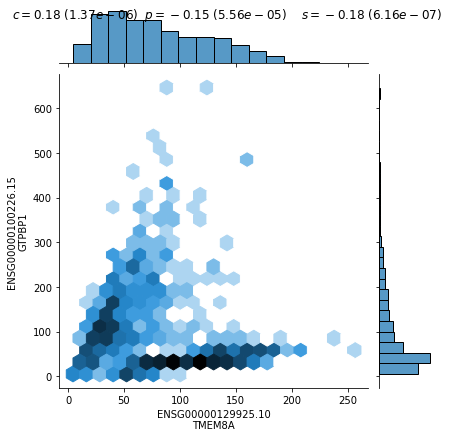

In [50]:
for i in range(min(_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_df, i)
    display(p.fig)
    plt.close(p.fig)

## CCC high, Pearson/Spearman low

In [51]:
cat_name = "ccc_high_and_spearman_pearson_low-"

In [52]:
_df = df_pvalues[df_pvalues["group"].str.startswith(cat_name)]

In [53]:
_df.shape

(8, 10)

In [54]:
_df = _df.sort_values("spearman_pvalue", ascending=False)
display(_df.head())

,,group,ccc,ccc_fdr,ccc_pvalue,pearson,pearson_fdr,pearson_pvalue,spearman,spearman_fdr,spearman_pvalue
gene0,gene1,,,,,,,,,,
ENSG00000125319.14,ENSG00000088325.15,ccc_high_and_spearman_pearson_low-top_ccc,0.183514,0.000001,9.999990e-07,-0.069207,0.071109,0.057334,-0.134905,2.407654e-04,2.010626e-04
ENSG00000101152.10,ENSG00000100226.15,ccc_high_and_spearman_pearson_low-top_ccc,0.193464,0.000001,9.999990e-07,-0.107576,0.005132,0.003080,-0.156998,1.810946e-05,1.466785e-05
ENSG00000170871.11,ENSG00000229598.1,ccc_high_and_spearman_pearson_low-top_pearson,0.181940,0.000001,9.999990e-07,-0.067078,0.080355,0.065453,-0.182466,5.713823e-07,4.469158e-07
ENSG00000100055.20,ENSG00000100226.15,ccc_high_and_spearman_pearson_low-top_ccc,0.184217,0.000001,9.999990e-07,-0.087254,0.022883,0.016480,-0.183848,4.669500e-07,3.643769e-07
ENSG00000162413.16,ENSG00000235027.1,ccc_high_and_spearman_pearson_low-top_ccc,0.184217,0.000001,9.999990e-07,0.062875,0.101362,0.084264,-0.186421,3.193013e-07,2.480890e-07


'Index: 0'

('ENSG00000125319.14', 'ENSG00000088325.15')

('C17orf53', 'TPX2')

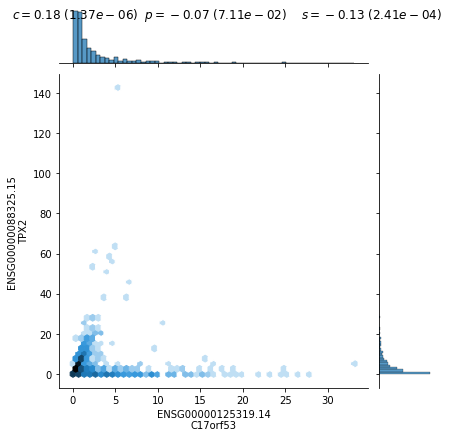

'Index: 1'

('ENSG00000101152.10', 'ENSG00000100226.15')

('DNAJC5', 'GTPBP1')

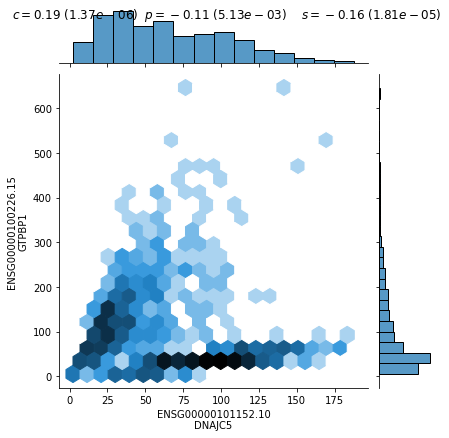

'Index: 2'

('ENSG00000170871.11', 'ENSG00000229598.1')

('KIAA0232', 'PRDX3P1')

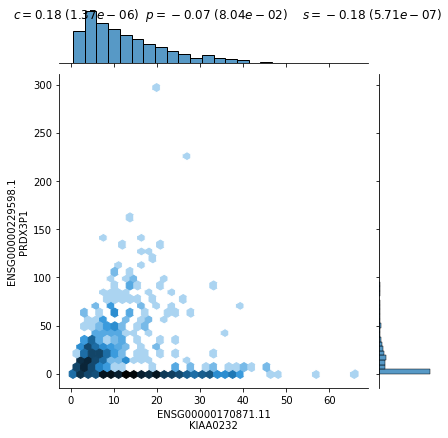

'Index: 3'

('ENSG00000100055.20', 'ENSG00000100226.15')

('CYTH4', 'GTPBP1')

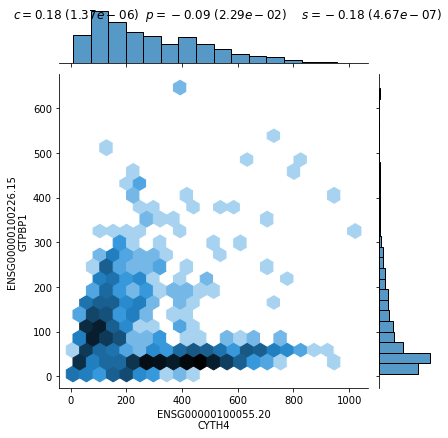

'Index: 4'

('ENSG00000162413.16', 'ENSG00000235027.1')

('KLHL21', 'AC068580.6')

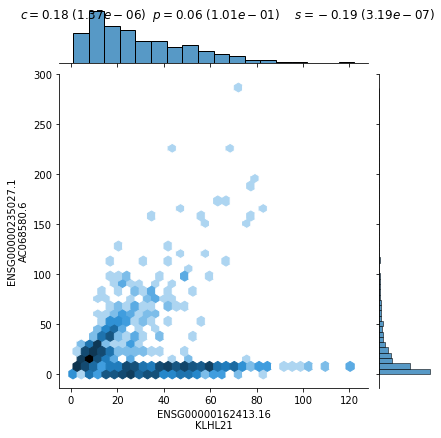

'Index: 5'

('ENSG00000251474.6', 'ENSG00000229598.1')

('RPL32P3', 'PRDX3P1')

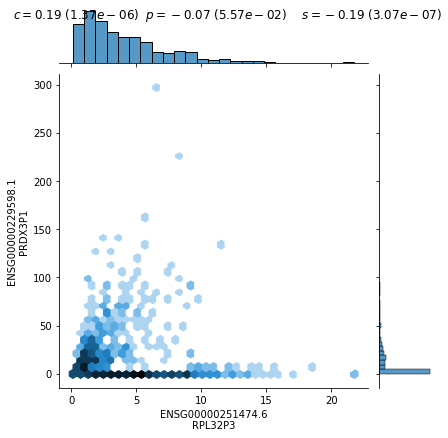

'Index: 6'

('ENSG00000189114.6', 'ENSG00000278330.1')

('BLOC1S3', 'RP11-4B16.4')

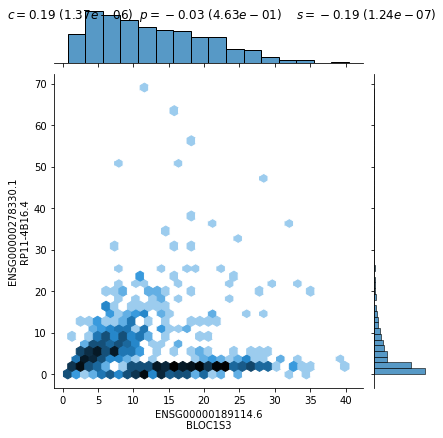

'Index: 7'

('ENSG00000225963.7', 'ENSG00000229598.1')

('AC009950.2', 'PRDX3P1')

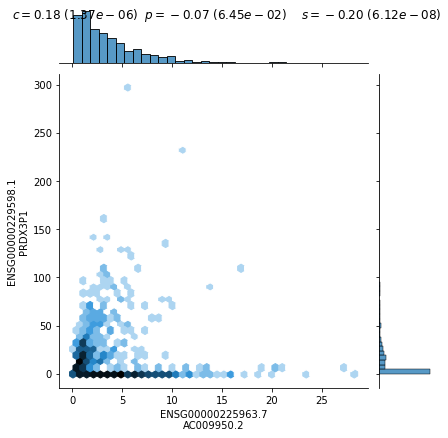

In [55]:
for i in range(min(_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_df, i)
    display(p.fig)
    plt.close(p.fig)

## Pearson high, CCC low

In [56]:
cat_name = "pearson_high_and_ccc_low-"

In [57]:
_df = df_pvalues[df_pvalues["group"].str.startswith(cat_name)]

In [58]:
_df.shape

(876, 10)

In [61]:
_df = _df.sort_values("ccc_pvalue", ascending=False)
display(_df.head())

,,group,ccc,ccc_fdr,ccc_pvalue,pearson,pearson_fdr,pearson_pvalue,spearman,spearman_fdr,spearman_pvalue
gene0,gene1,,,,,,,,,,
ENSG00000086967.9,ENSG00000185482.7,pearson_high_and_ccc_low-top_pearson,0.013219,0.001679,0.001545,0.773951,1.078632e-150,1.439420e-151,0.219206,1.636112e-09,1.147643e-09
ENSG00000185482.7,ENSG00000180209.11,pearson_high_and_ccc_low-top_pearson,0.013443,0.001359,0.001247,0.731125,2.422642e-126,3.590561e-127,0.221139,1.159884e-09,8.126509e-10
ENSG00000139194.7,ENSG00000118137.9,pearson_high_and_ccc_low-top_pearson,0.014090,0.000989,0.000901,0.774653,3.889901e-151,5.175184e-152,0.201909,3.086048e-08,2.187940e-08
ENSG00000072954.6,ENSG00000101470.9,pearson_high_and_ccc_low-top_pearson,0.015566,0.000564,0.000508,0.668870,2.679885e-98,4.561043e-99,0.202503,2.801316e-08,1.985501e-08
ENSG00000164405.10,ENSG00000130005.12,pearson_high_and_ccc_low-top_pearson,0.017239,0.000291,0.000257,0.495637,1.851260e-47,4.692221e-48,0.232847,1.350636e-10,9.380484e-11


'Index: 0'

('ENSG00000086967.9', 'ENSG00000185482.7')

('MYBPC2', 'STAC3')

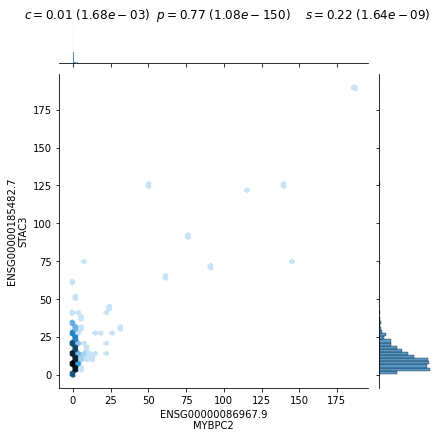

'Index: 1'

('ENSG00000185482.7', 'ENSG00000180209.11')

('STAC3', 'MYLPF')

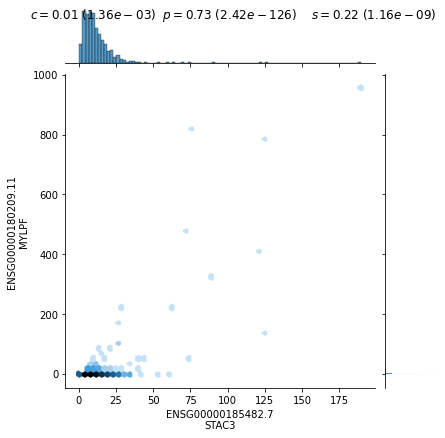

'Index: 2'

('ENSG00000139194.7', 'ENSG00000118137.9')

('RBP5', 'APOA1')

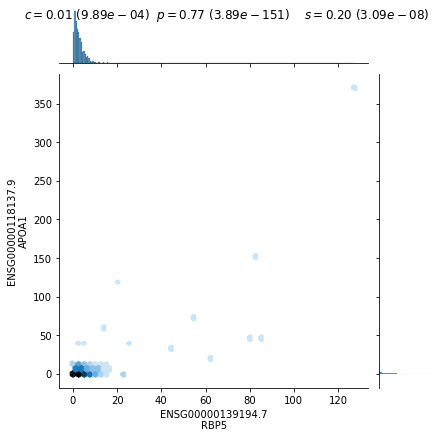

'Index: 3'

('ENSG00000072954.6', 'ENSG00000101470.9')

('TMEM38A', 'TNNC2')

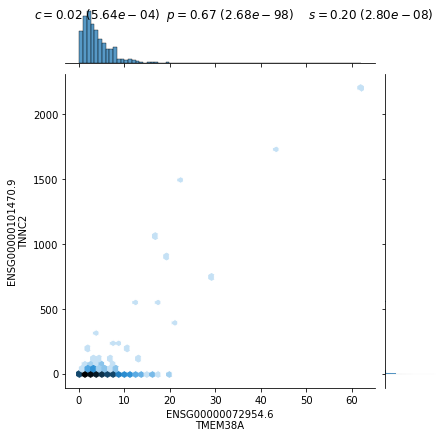

'Index: 4'

('ENSG00000164405.10', 'ENSG00000130005.12')

('UQCRQ', 'GAMT')

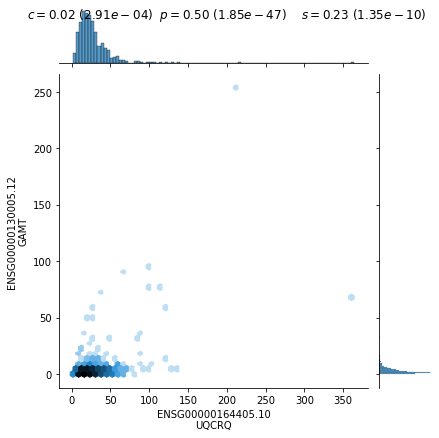

'Index: 5'

('ENSG00000100342.20', 'ENSG00000258666.1')

('APOL1', 'RP11-638I2.8')

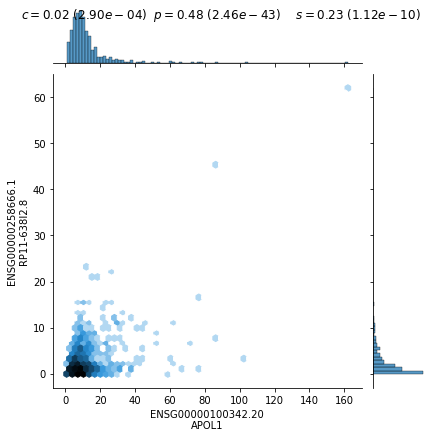

'Index: 6'

('ENSG00000125730.16', 'ENSG00000019169.10')

('C3', 'MARCO')

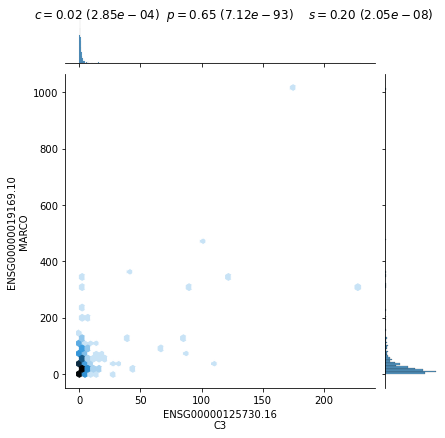

'Index: 7'

('ENSG00000164405.10', 'ENSG00000169136.10')

('UQCRQ', 'ATF5')

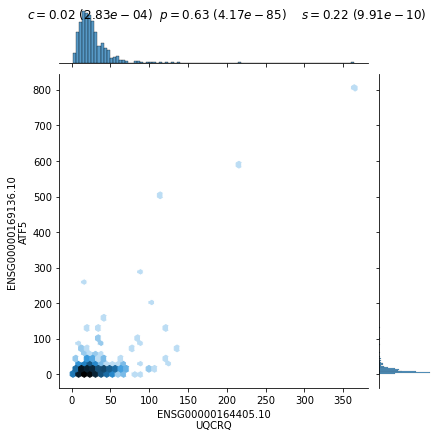

'Index: 8'

('ENSG00000185482.7', 'ENSG00000168530.15')

('STAC3', 'MYL1')

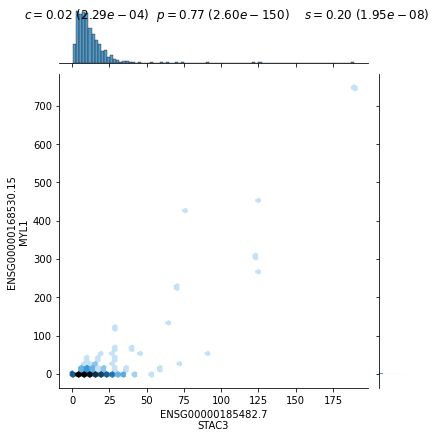

'Index: 9'

('ENSG00000185482.7', 'ENSG00000125414.18')

('STAC3', 'MYH2')

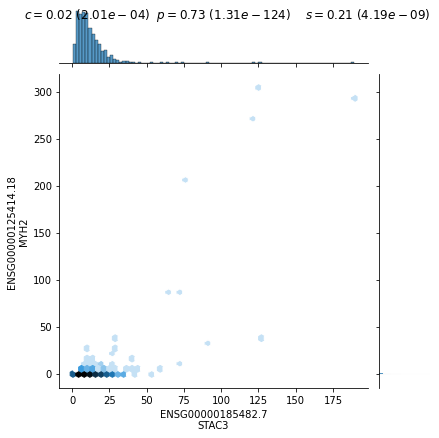

In [62]:
for i in range(min(_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_df, i)
    display(p.fig)
    plt.close(p.fig)

## Pearson high, Spearman low

## Pearson high, CCC/Spearman low

## Spearman high, Pearson low

# Save

In [30]:
INPUT_PVALUES_FILE.parent

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/pvalues')

In [31]:
INPUT_PVALUES_FILE.stem

'gene_pair-samples-pvalues'

In [32]:
INPUT_PVALUES_FILE.suffix

'.pkl'

In [33]:
output_file = (
    INPUT_PVALUES_FILE.parent
    / f"{INPUT_PVALUES_FILE.stem}-fdr{INPUT_PVALUES_FILE.suffix}"
)
display(output_file)

PosixPath('/opt/data/results/gtex_v8/gene_pair_intersections/pvalues/gene_pair-samples-pvalues-fdr.pkl')

In [34]:
pvalues.to_pickle(output_file)